In [1]:
%load_ext autoreload
%autoreload 2

from propose.datasets.rat7m import Rat7mDataset
from propose.poses.rat7m import Rat7mPose

import propose.datasets.rat7m.transforms as tr

from neuralpredictors.data.transforms import ScaleInputs

import matplotlib.pyplot as plt

# Preprocessing of the Rat7m dataset
---
## Config parameters

In [2]:
dirname = '/Users/paulpierzchlewicz/PycharmProjects/propose/data/rat7m' # Choose this such that it points to your dataset
data_key = 's4-d1'

In [3]:
dataset = Rat7mDataset(dirname=dirname, data_key=data_key, transforms=[
    tr.SwitchArmsElbows(),
    tr.CropImageToPose(),
    tr.RotatePoseToCamera(),
    tr.CenterPose(),
    tr.ScalePose(scale=0.03),
    ScaleInputs(scale=0.5, multichannel=True, anti_aliasing=True),
    tr.ToGraph()
])

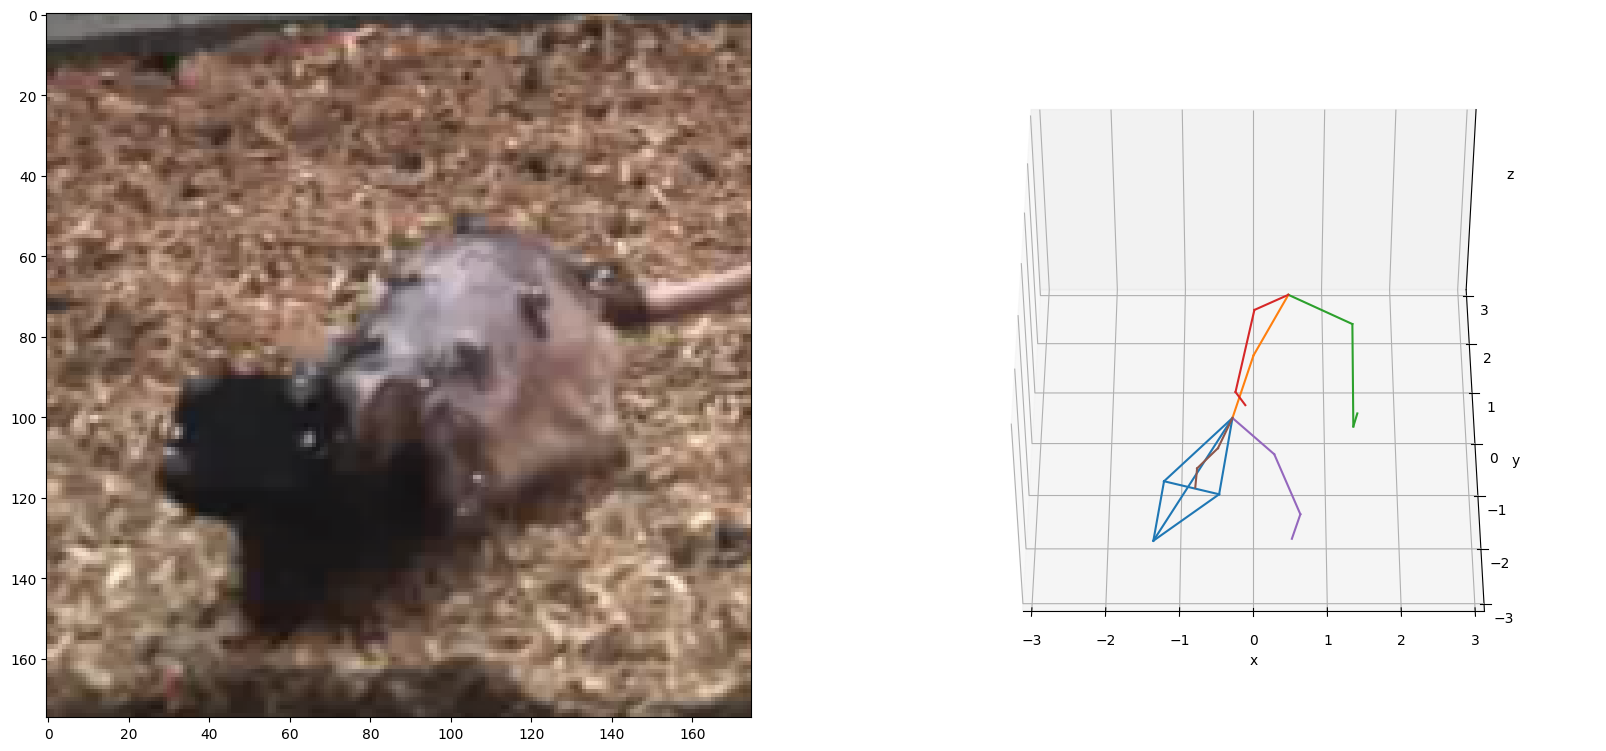

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

res = dataset[10000]
pose_matrix = res.pose_matrix
adjacency_matrix = res.adjacency_matrix
pose = Rat7mPose(pose_matrix)
image = res.image

plt.style.use('default')
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)

ax1.imshow(image.astype(int))

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.get_proj = lambda: np.dot(Axes3D.get_proj(ax2), np.diag([1, 1, 0.75, 1]))
ax2.view_init(45,  90)
ax2.set_xlim(3, -3)
ax2.set_ylim(3, -3)
ax2.set_zlim(-1, 1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_zticks([])

pose.plot(ax=ax2)
plt.show()